Data wrangling for Unit 2 example
----
Mark Cohen

Original data source: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Source citations can be found in the file `chronic_kidney_disease.info.txt`.

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Reading in the data

## Reading .arff files using scipy:
 
`scipy.io.arff.loadarff(file)` should input as a tuple of a dictionary of numpy arrays and metadata, so it can be converted into a pandas data frame with labeled columns.

However, the data seems to not be clean: some of the data elements have extraneous spaces or tabs, which prevents them from being read correctly.

In [2]:
try: 
    data, metadata = arff.loadarff('chronic_kidney_disease_full.arff')
except ValueError as e:
    print(f'Reading .arff file fails with error: {e}')

Reading .arff file fails with error: 	no value not in ('yes', 'no')


## Reading the file in manually

So, we can do it the hard way: reading in line-by-line to extract data and needed meta-data.

The cell below produces a DataFrame with the correct columns. NB at this point, the data is all strings, though with extraneous whitespace stripped off.

Note that missing values are indicated with `?` in the data.

In [3]:
metadata = ''
colnames = []
coltypes = {}
raw_data = []

with open('chronic_kidney_disease_full.arff') as f:
    for line in f:
        if line[0] == '%':
            metadata += line[1:]
        elif line.startswith('@attribute'):
            parts = line.strip().split(' ')
            name = parts[1][1:-1]
            colnames.append(name)
            coltype = 'numeric' if parts[-1] == 'numeric' else 'categorical'
            coltypes[name] = coltype
        elif line[0] not in ('\n', '@'):
            raw_data.append(list(map(str.strip,line.strip().split(','))))
            if len(raw_data[-1]) != 25:
                print(raw_data[-1])

df = pd.DataFrame(raw_data, columns=colnames).replace('?', np.nan)
df.head().T


,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.020,1.020,1.010,1.005,1.010
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,NaN,423,117,106


In [4]:
print(metadata)

 1. Title: Early stage of Indians Chronic Kidney Disease(CKD)

 2. Source Information:
   (a) Source: 
			Dr.P.Soundarapandian.M.D.,D.M
		     (Senior Consultant Nephrologist), 
			Apollo  Hospitals, 
			Managiri,
			Madurai Main Road, 
			Karaikudi,
			Tamilnadu,
			India.
   (b) Creator: 
			L.Jerlin Rubini(Research Scholar)
			Alagappa University
			EmailId   :jel.jerlin@gmail.com
			ContactNo :+91-9597231281
   (c) Guided by: 
			Dr.P.Eswaran Assistant Professor,
			Department of Computer Science and Engineering,
			Alagappa University,
			Karaikudi,
			Tamilnadu,
			India.
			Emailid:eswaranperumal@gmail.com
   (d) Date     : july 2015

 3.Relevant Information:
			age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
	

## Converting data types

Using the column types from the metadata extracted from the file, each column is converted to the appropriate type, float or categorical.

Note the substantial number of missing values in some columns.

In [5]:
numeric_cols = []
cat_cols = []
for col, coltype in coltypes.items():
    if coltype == 'numeric':
        df[col] = df[col].astype('float')
        numeric_cols.append(col)
    else:
        df[col] = df[col].astype('category')
        cat_cols.append(col)

# print(coltypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    category
 3   al      354 non-null    category
 4   su      351 non-null    category
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wbcc    294 non-null    float64 
 17  rbcc    269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

# Outliers and missing values

Some of the numerical columns appear to have unusual outliers.

              age          bp         bgr          bu          sc         sod  \
count  391.000000  388.000000  356.000000  381.000000  383.000000  313.000000   
mean    51.483376   76.469072  148.036517   57.425722    3.072454  137.528754   
std     17.169714   13.683637   79.281714   50.503006    5.741126   10.408752   
min      2.000000   50.000000   22.000000    1.500000    0.400000    4.500000   
25%     42.000000   70.000000   99.000000   27.000000    0.900000  135.000000   
50%     55.000000   80.000000  121.000000   42.000000    1.300000  138.000000   
75%     64.500000   80.000000  163.000000   66.000000    2.800000  142.000000   
max     90.000000  180.000000  490.000000  391.000000   76.000000  163.000000   

              pot        hemo         pcv          wbcc        rbcc  
count  312.000000  348.000000  329.000000    294.000000  269.000000  
mean     4.627244   12.526437   38.884498   8406.122449    4.707435  
std      3.193904    2.912587    8.990105   2944.474190    1

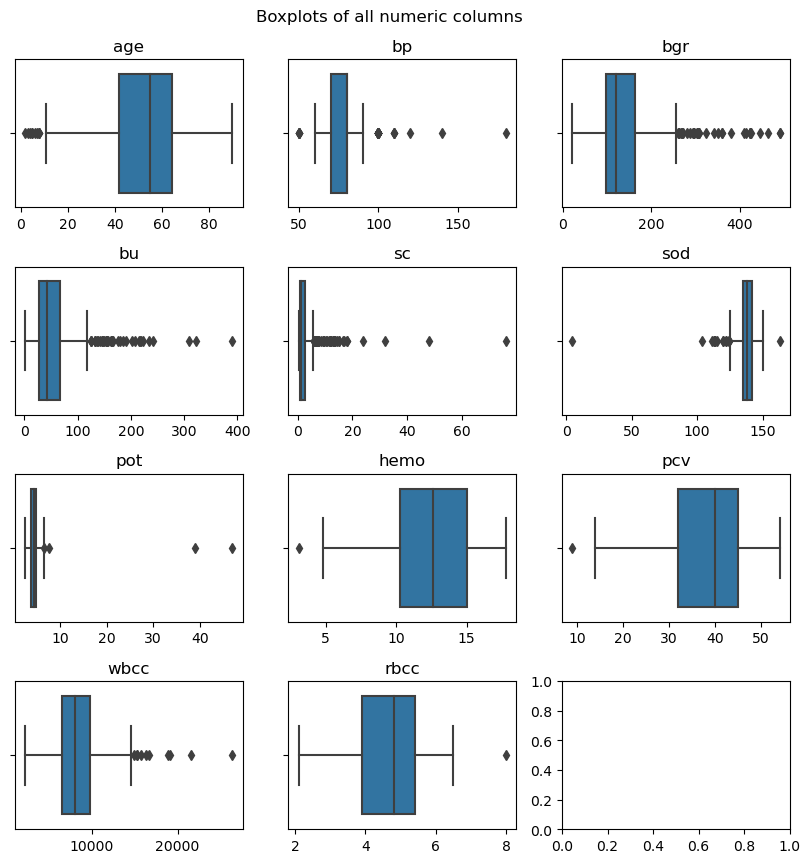

In [18]:
# TODO fix sizing and spacing
print(df.describe())

nplots = len(numeric_cols)
fig, axes = plt.subplots((nplots+2)//3, 3)
axes = axes.reshape(-1)
for i, col in enumerate(numeric_cols):
    _ = sns.boxplot(df, x=col, ax=axes[i]).set_xlabel('')
    axes[i].set_title(col)
    # axes[i].
fig.set_size_inches(10,10)
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Boxplots of all numeric columns', y=0.93);

The categorical columns, including the target feature, are generally imbalanced.

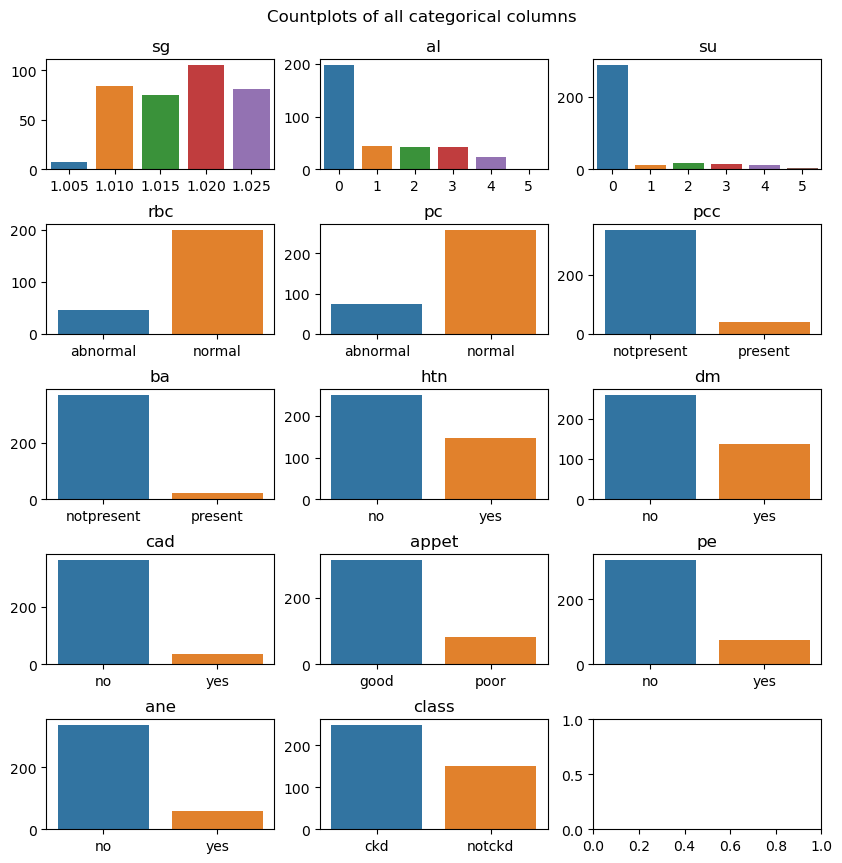

In [20]:
nplots = len(cat_cols)
fig, axes = plt.subplots((nplots+2)//3, 3)
axes = axes.reshape(-1)
for i, col in enumerate(cat_cols):
    _ = sns.countplot(df, x=col, ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_title(col)
fig.set_size_inches(10,10)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Countplots of all categorical columns', y=0.93);

For missing values on categorical variables, they can be replaced with the mode, except for the clearly ordinal `sg`, which can use the median.

We can see below that some records have many missing values: over 50 have at least 6 missing columns, i.e. a fourth of the features. There is a need to weigh the limited information from these records with the loss of information from dropping them.

These considerations will be handled in the example notebook.

In [8]:
print('Number of missing values: count of observations')
print(df.isna().sum(axis=1).sort_values(ascending=False).value_counts(sort=False))

Number of missing values: count of observations
11      7
10      4
9      12
8       8
7      20
6      12
5      33
4      31
3      37
2      33
1      45
0     158
dtype: int64


# Saving a .csv file

For easy loading the main notebook, we can save the data as a `.csv` file.

NOTE: `sg`, `al`, and `su` are saved as numerical values so will be read as floating point. So `sg` this certainly seems valid, but it is not clear what is the scale for the albumin and sugar measures.

In [9]:
df.to_csv('ckd_data.csv', index=False)